In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
header = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
          'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
          'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
          'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
          'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
          'UsingPopupWindow', 'IframeRedirection', 'AgeOfDomain',
          'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
          'LinksPointingToPage', 'StatsReport', 'Class']

data = pd.read_csv("/content/phishing.txt", header=None, names=header, delimiter=',')
X = data.drop("Class", axis=1)
y = data["Class"]
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeOfDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,Class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# Exercise 1: Logistic Regression with full features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr_model = LogisticRegression(C=100)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, lr_predictions)
misclassified = np.sum(y_test != lr_predictions)

print("Exercise 1 - Logistic Regression")
print("Misclassified samples:", misclassified)
print("Accuracy:", accuracy)

Exercise 1 - Logistic Regression
Misclassified samples: 259
Accuracy: 0.9219173952366596


In [5]:
X_train.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeOfDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport'],
      dtype='object')

In [7]:

# Exercise 2: Logistic Regression with two features
X_train_2feat = X_train[['PrefixSuffix-', 'AnchorURL']]
X_test_2feat = X_test[['PrefixSuffix-', 'AnchorURL']]

lr_model_2feat = LogisticRegression(C=100)
lr_model_2feat.fit(X_train_2feat, y_train)
lr_predictions_2feat = lr_model_2feat.predict(X_test_2feat)

accuracy_2feat = accuracy_score(y_test, lr_predictions_2feat)
accuracy_2feat

0.8546879710581851

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Exercise 2 - Logistic Regression with 2 features
Accuracy: 0.8546879710581851


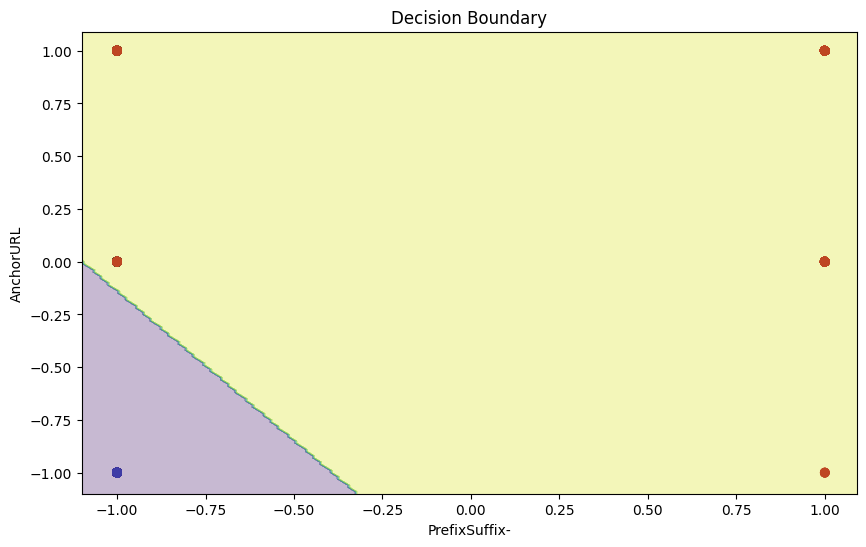

In [8]:

# Plotting the decision boundary
def plot_decision_boundary(X, y, model, index_1, index_2):
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, index_1], X.iloc[:, index_2], c=y, cmap='coolwarm')
    plt.xlabel(X.columns[index_1])
    plt.ylabel(X.columns[index_2])

    x_min, x_max = X.iloc[:, index_1].min() - 0.1, X.iloc[:, index_1].max() + 0.1
    y_min, y_max = X.iloc[:, index_2].min() - 0.1, X.iloc[:, index_2].max() + 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.title("Decision Boundary")

plot_decision_boundary(X_test_2feat, y_test, lr_model_2feat, 0, 1)

print("Exercise 2 - Logistic Regression with 2 features")
print("Accuracy:", accuracy_2feat)
plt.show()
